# **UTS Praktikum Pembelajaran Mesin**

**Nama:** Refa Muhammad            
**NIM:** 1227050113

# **Import Library**

In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# **Memuat Dataset**

In [165]:
df = pd.read_csv('dataset_buys _comp.csv')  # sesuaikan nama file


In [166]:
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


# **Exploratory Data Analysis (EDA)**

## 1. Memahami Struktur Data

In [167]:
print(df.describe())

       Buys_Computer
count    1000.000000
mean        0.669000
std         0.470809
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


## 2. Meriksa Data yang Hilang

In [169]:
print(df.isnull().sum())

Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


## 3. Meriksa Data Duplikat

In [170]:
print(df.duplicated().sum())

949


## 4. Analisis Distribusi dan Korelasi 

<Figure size 1500x1000 with 0 Axes>

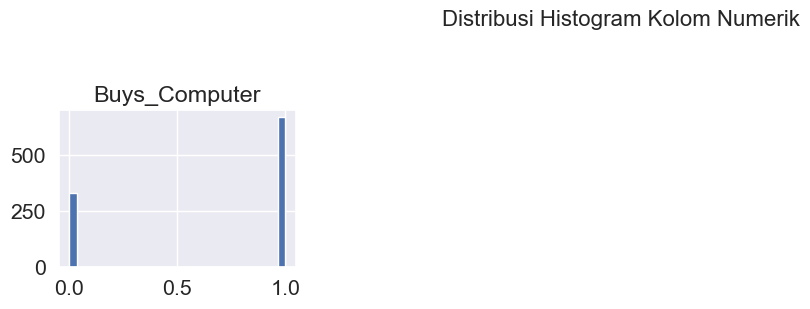

In [171]:
# Pilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=30, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Distribusi Histogram Kolom Numerik", fontsize=16)
plt.show()

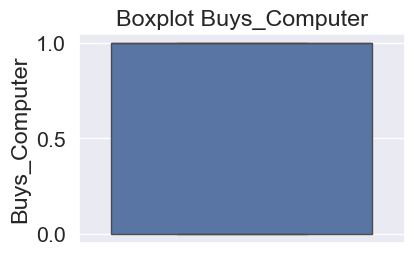

In [172]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")
    plt.tight_layout()

plt.show()

In [173]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Age', 'Income', 'Student', 'Credit_Rating'], dtype='object')


C:\Users\refam\AppData\Local\Temp\ipykernel_20748\2735934460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")
C:\Users\refam\AppData\Local\Temp\ipykernel_20748\2735934460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")
C:\Users\refam\AppData\Local\Temp\ipykernel_20748\2735934460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette=

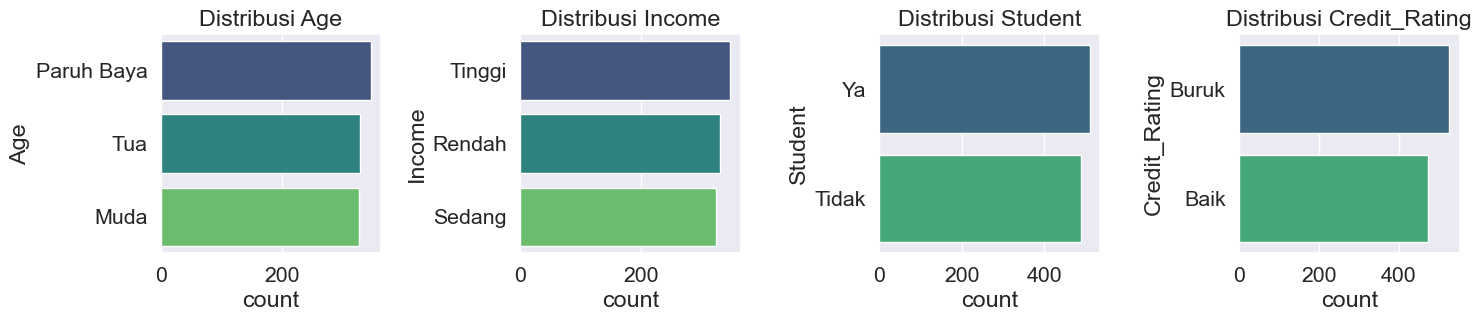

In [174]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")
    plt.title(f"Distribusi {col}")
    plt.tight_layout()

plt.show()

# **Data Preprocessing**

## Encoding

In [175]:
# Pilih hanya kolom bertipe object (kategorikal)
categorical_columns = df.select_dtypes(include=['object'])

# Hitung jumlah kategori unik di setiap kolom kategorikal
category_counts = categorical_columns.nunique()

# Tampilkan hasil
print(category_counts)

Age              3
Income           3
Student          2
Credit_Rating    2
dtype: int64


In [176]:
# One-hot encoding (drop_first=True untuk hindari dummy variable trap)
df_encoded = pd.get_dummies(df, columns=['Age', 'Income', 'Student', 'Credit_Rating'], drop_first=True)


# **Pisahkan fitur dan target**


In [177]:
X = df_encoded.drop('Buys_Computer', axis=1) 
y = df_encoded['Buys_Computer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Pembangunan Model Klafikasi**

In [178]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# **Evaluasi Model**

In [179]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.805
[[ 57  14]
 [ 25 104]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200



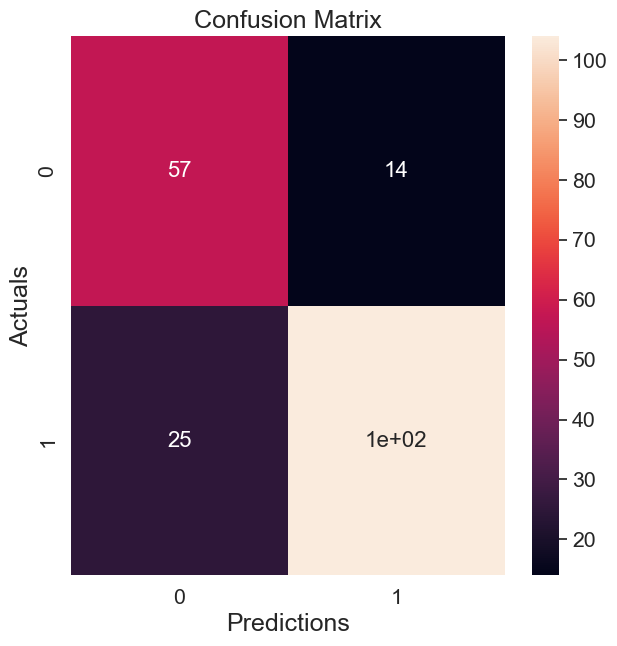

In [180]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, ax=ax,annot=True, annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#  **Menampilkan Visualisasi Tree**

In [181]:
features = ['Age','Income', 'Student', 'Credit_Rating']


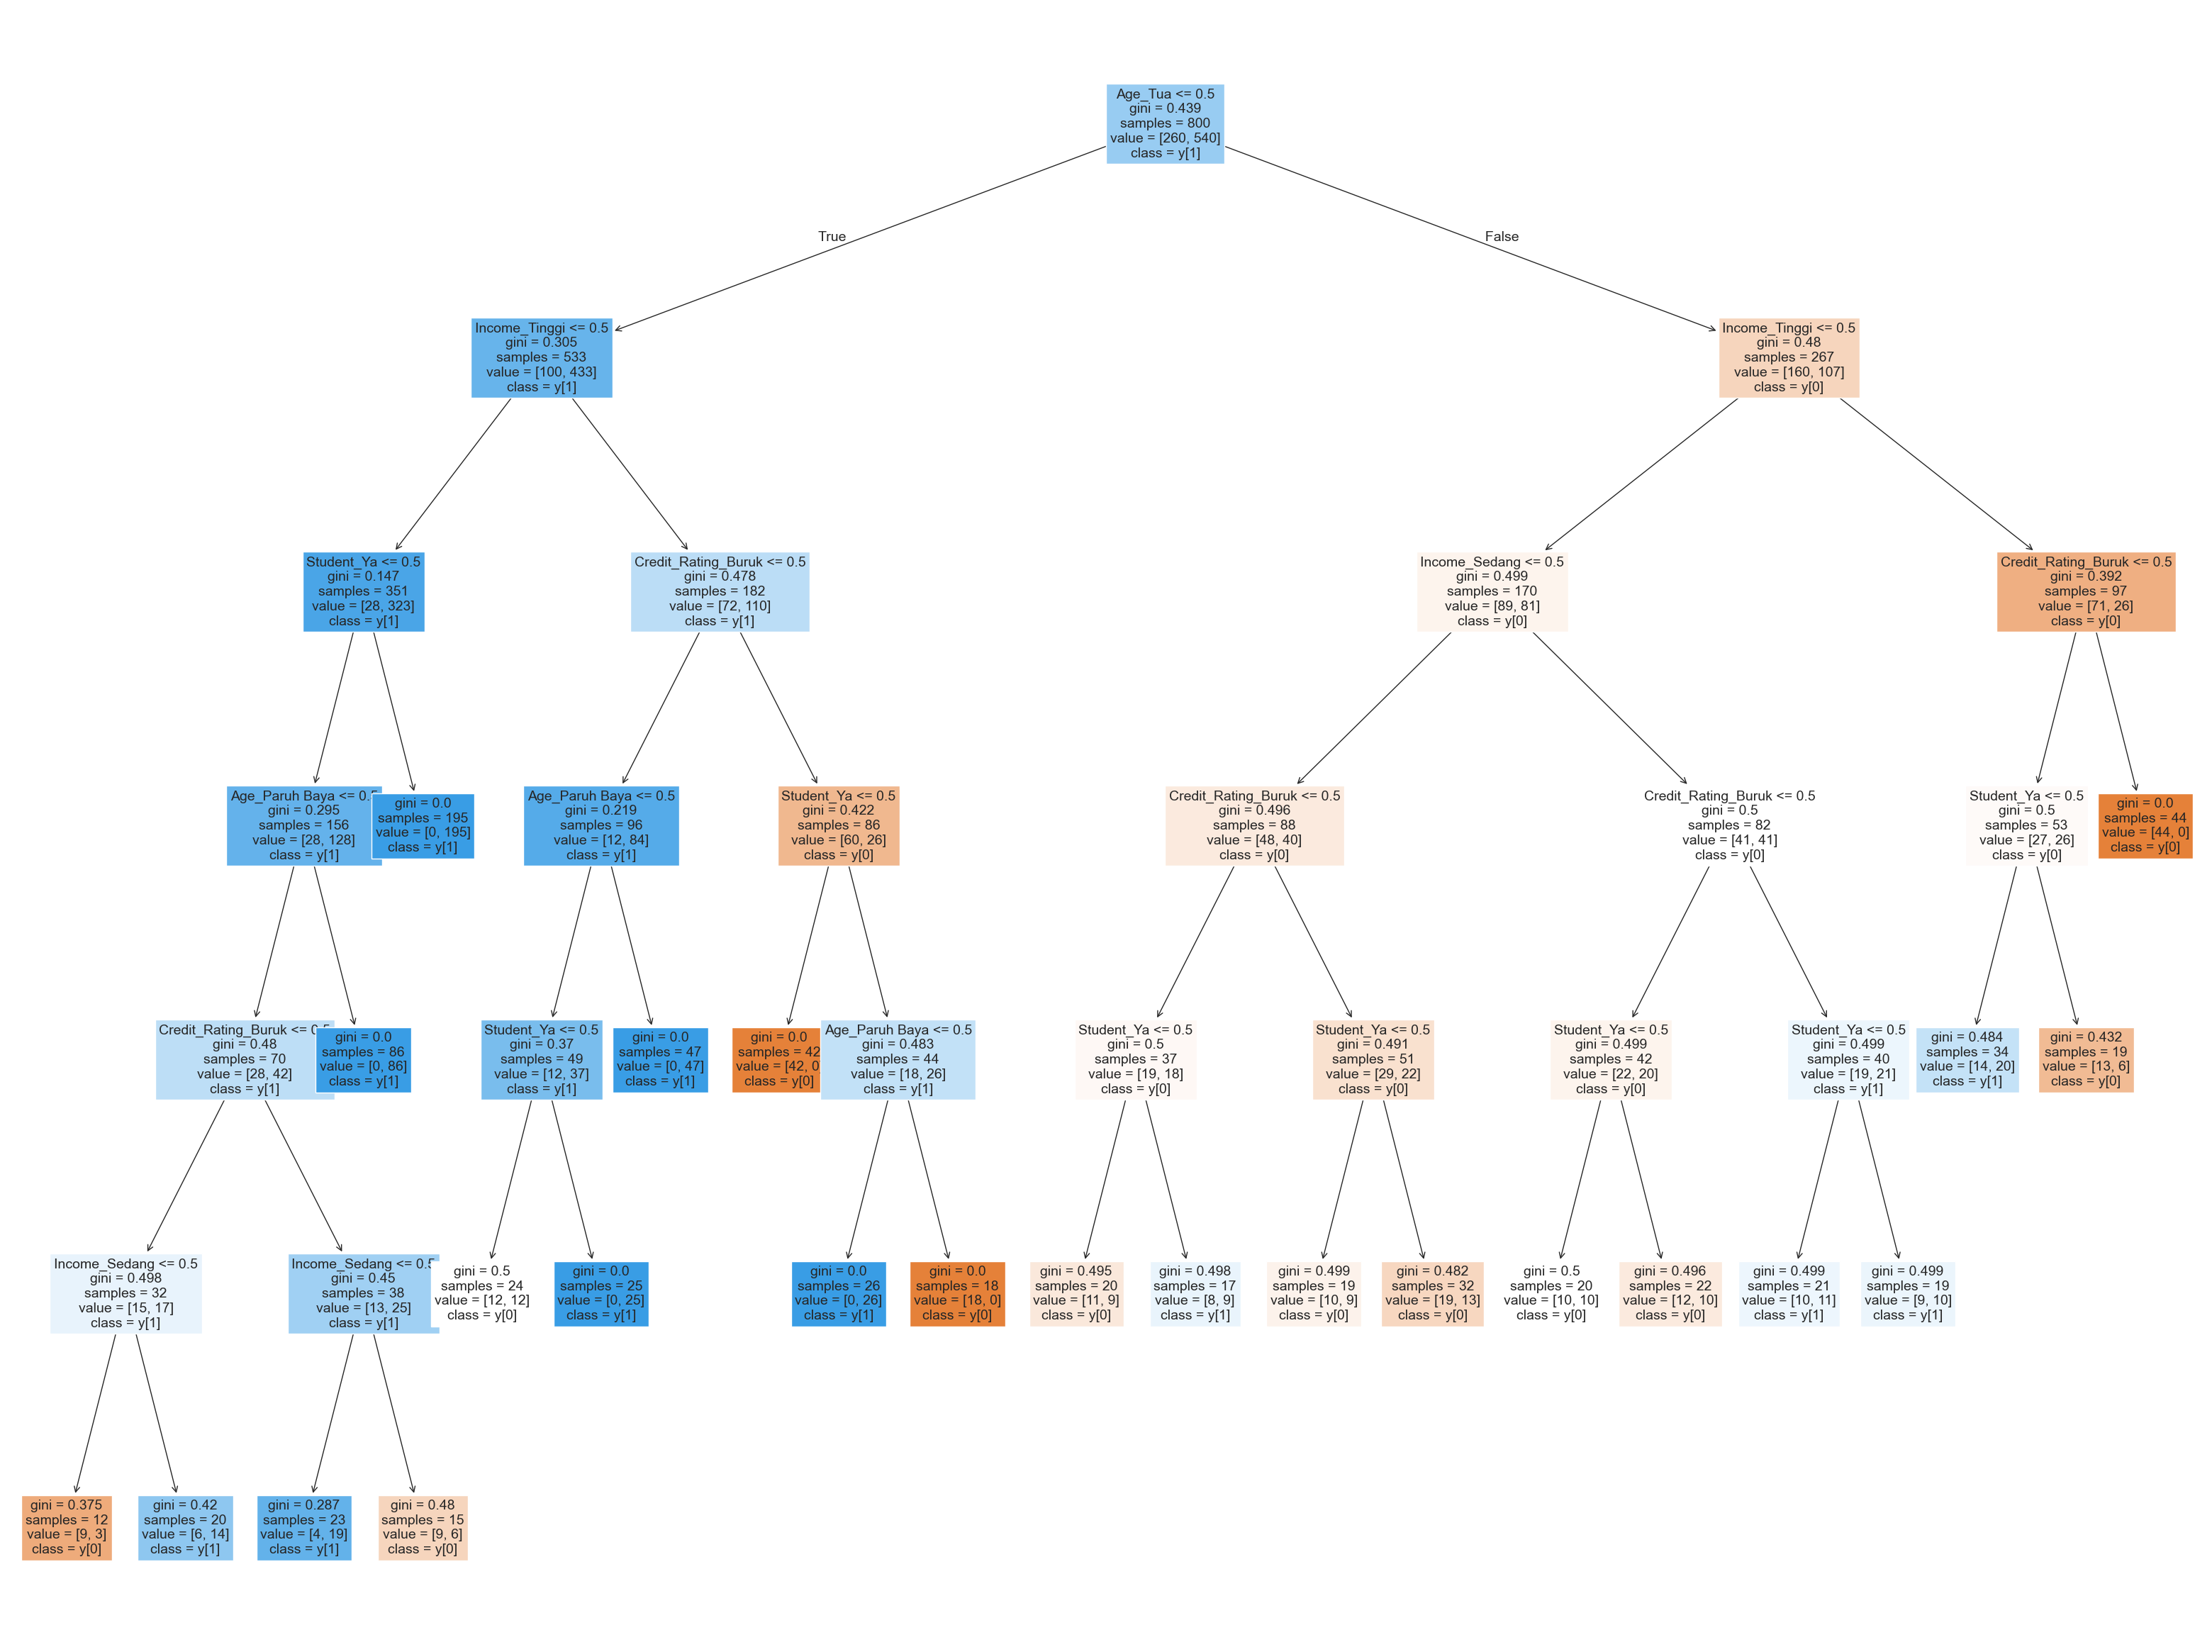

In [182]:
fig, ax = plt.subplots(figsize=(40, 30))  # Lebih besar
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=True,
    filled=True,
    fontsize=14  # Perbesar font size
)
plt.show()
